In [3]:
import os
import numpy as np
from glob import glob
import cv2   
import matplotlib.pyplot as plt
import seaborn as sb
import json
import platform
import mediapipe as mp


from eye_tracker_dataset import EyeTrackerDataset
import sys

sys.path.append("..")
from eye_tracker_auto_labeller.scripts import mediapipe_visualizer

mp_face_mesh = mp.solutions.face_mesh

def edge_list_2_path(edge_list) :
    tesel = edge_list
    change_occured = True
    while change_occured :
        change_occured = False
        for idx in range(len(tesel)) :
            target_edge = tesel[idx]
            inner_changed = False
            for e in tesel :
                if e != target_edge and len(e) < 3 :
                    edge = e
                    if target_edge[-1] == edge[0] :
                        target_edge.append(edge[-1])
                        tesel.remove(edge)
                        change_occured = True
                        inner_changed = True
                        break
                    if target_edge[0] == edge[-1] :
                        target_edge.insert(0, edge[0])
                        tesel.remove(edge)
                        change_occured = True
                        inner_changed  = True
                        break
            if inner_changed :
                break
    change_occured = True
    while change_occured :
        change_occured = False
        for idx in range(len(tesel)) :
            source_path = tesel[idx]
            inner_changed = False
            for target_path in tesel :
                if target_path == source_path :
                    continue
                if source_path[-1] == target_path[-1] :
                    target_path.reverse()
                    source_path += target_path[1:]
                    tesel.remove(target_path)
                    change_occured = True
                    inner_changed = True
                    break
                if source_path[0] == target_path[0] :
                    source_path.reverse()
                    target_path += source_path[1:]
                    tesel.remove(source_path)
                    change_occured = True
                    inner_changed = True
                    break
            if inner_changed :
                break
    return tesel


FACE_TESSELATION_PATH_LIST = edge_list_2_path(np.array(list(
    mp_face_mesh.FACEMESH_TESSELATION
)).tolist())
FACE_OVAL_PATH_LIST = edge_list_2_path(np.array(list(
    mp_face_mesh.FACEMESH_FACE_OVAL
)).tolist())
FACE_LIPS_PATH_LIST = edge_list_2_path(np.array(list(
    mp_face_mesh.FACEMESH_LIPS
)).tolist())
FACE_LEFT_EYEBROW_PATH_LIST = edge_list_2_path(np.array(list(
    mp_face_mesh.FACEMESH_LEFT_EYEBROW
)).tolist())
FACE_LEFT_EYE_PATH_LIST = edge_list_2_path(np.array(list(
    mp_face_mesh.FACEMESH_LEFT_EYE
)).tolist())
FACE_LEFT_IRIS_PATH_LIST = edge_list_2_path(np.array(list(
    mp_face_mesh.FACEMESH_LEFT_IRIS
)).tolist())
FACE_RIGHT_EYEBROW_PATH_LIST = edge_list_2_path(np.array(list(
    mp_face_mesh.FACEMESH_RIGHT_EYEBROW
)).tolist())
FACE_RIGHT_EYE_PATH_LIST = edge_list_2_path(np.array(list(
    mp_face_mesh.FACEMESH_RIGHT_EYE
)).tolist())
FACE_RIGHT_IRIS_PATH_LIST = edge_list_2_path(np.array(list(
    mp_face_mesh.FACEMESH_RIGHT_IRIS
)).tolist())

def torch_to_numpy(torch_img) :
    return (torch_img.permute([1, 2, 0]).numpy() * 255).astype(np.uint8)

def convert2imagecoord(image, array, array_idx_list) :
    image_shape = np.array([image.shape[1], image.shape[0]])
    return (array[array_idx_list][:,  :2] * image_shape).astype(int)

SYSTEM_NAME = platform.system()
if SYSTEM_NAME == "Windows" :
    DATA_ROOT_PATH = "D:/data"
if SYSTEM_NAME == "Darwin" :
    DATA_ROOT_PATH = "../eye_tracker_auto_labeller/data/"


eye_tracker_dataset = EyeTrackerDataset(data_root_path=DATA_ROOT_PATH, return_landmark=False)
eye_tracker_dataset_with_landmark = EyeTrackerDataset(data_root_path=DATA_ROOT_PATH)
eye_tracker_dataset_full = EyeTrackerDataset(data_root_path=DATA_ROOT_PATH, return_image =True)

two_D_visualizer = mediapipe_visualizer.TwoDimensionVisualizer()

print(len(eye_tracker_dataset))


objc[9734]: Class CaptureDelegate is implemented in both /opt/anaconda3/envs/first/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x16a7765a0) and /opt/anaconda3/envs/first/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x16d6d8860). One of the two will be used. Which one is undefined.
objc[9734]: Class CVWindow is implemented in both /opt/anaconda3/envs/first/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x16a7765f0) and /opt/anaconda3/envs/first/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x168748a68). One of the two will be used. Which one is undefined.
objc[9734]: Class CVView is implemented in both /opt/anaconda3/envs/first/lib/python3.10/site-packages/cv2/cv2.abi3.so (0x16a776618) and /opt/anaconda3/envs/first/lib/python3.10/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x168748a90). One of the two will be used. Which one is undefined.
objc[9734]: Class CVSlider is implemented in both /opt/anacond

9513


[162, 21, 54, 103, 67, 109, 10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162]


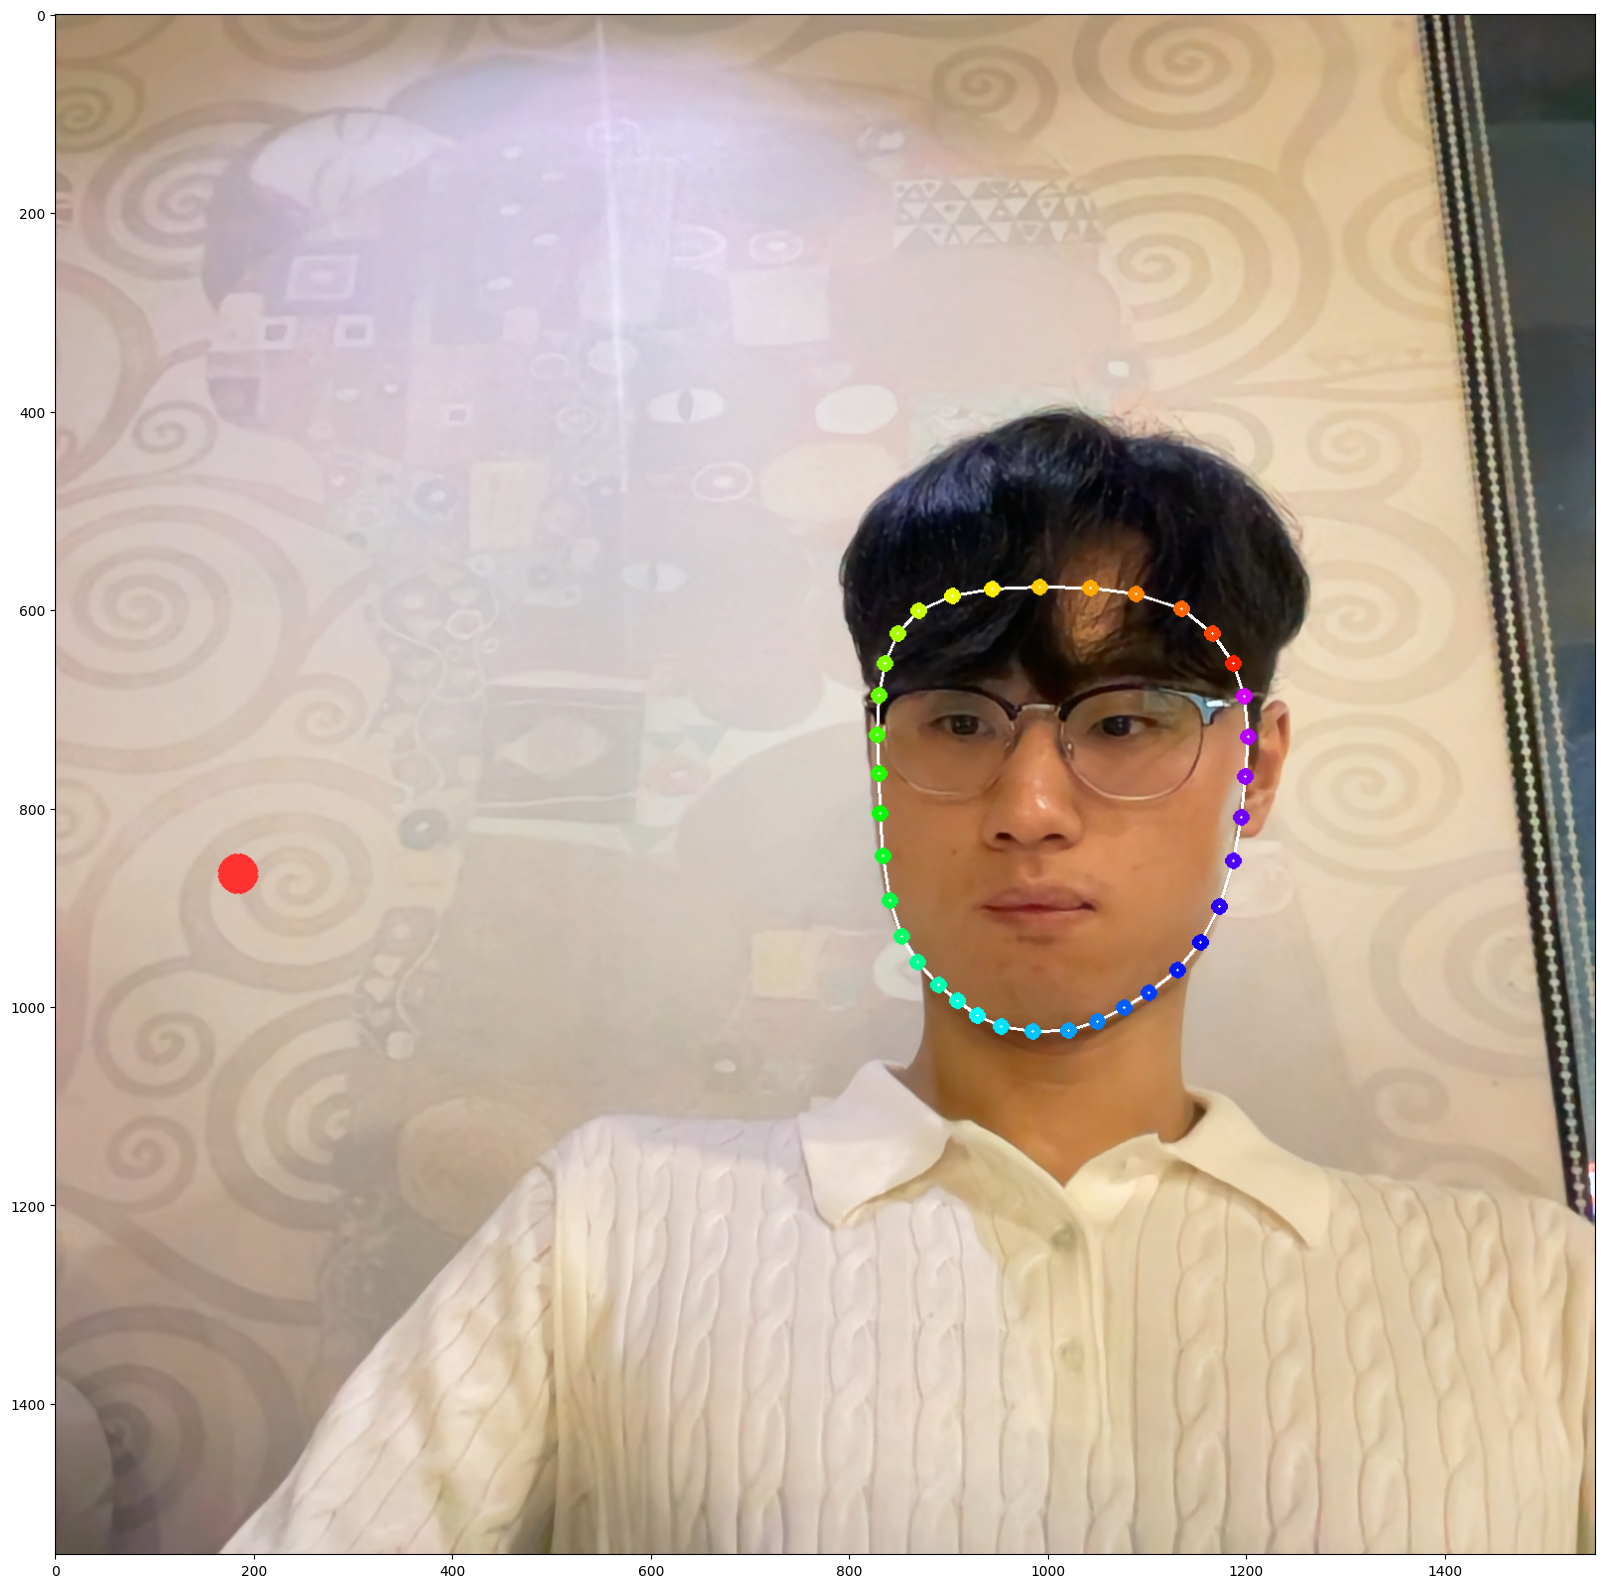

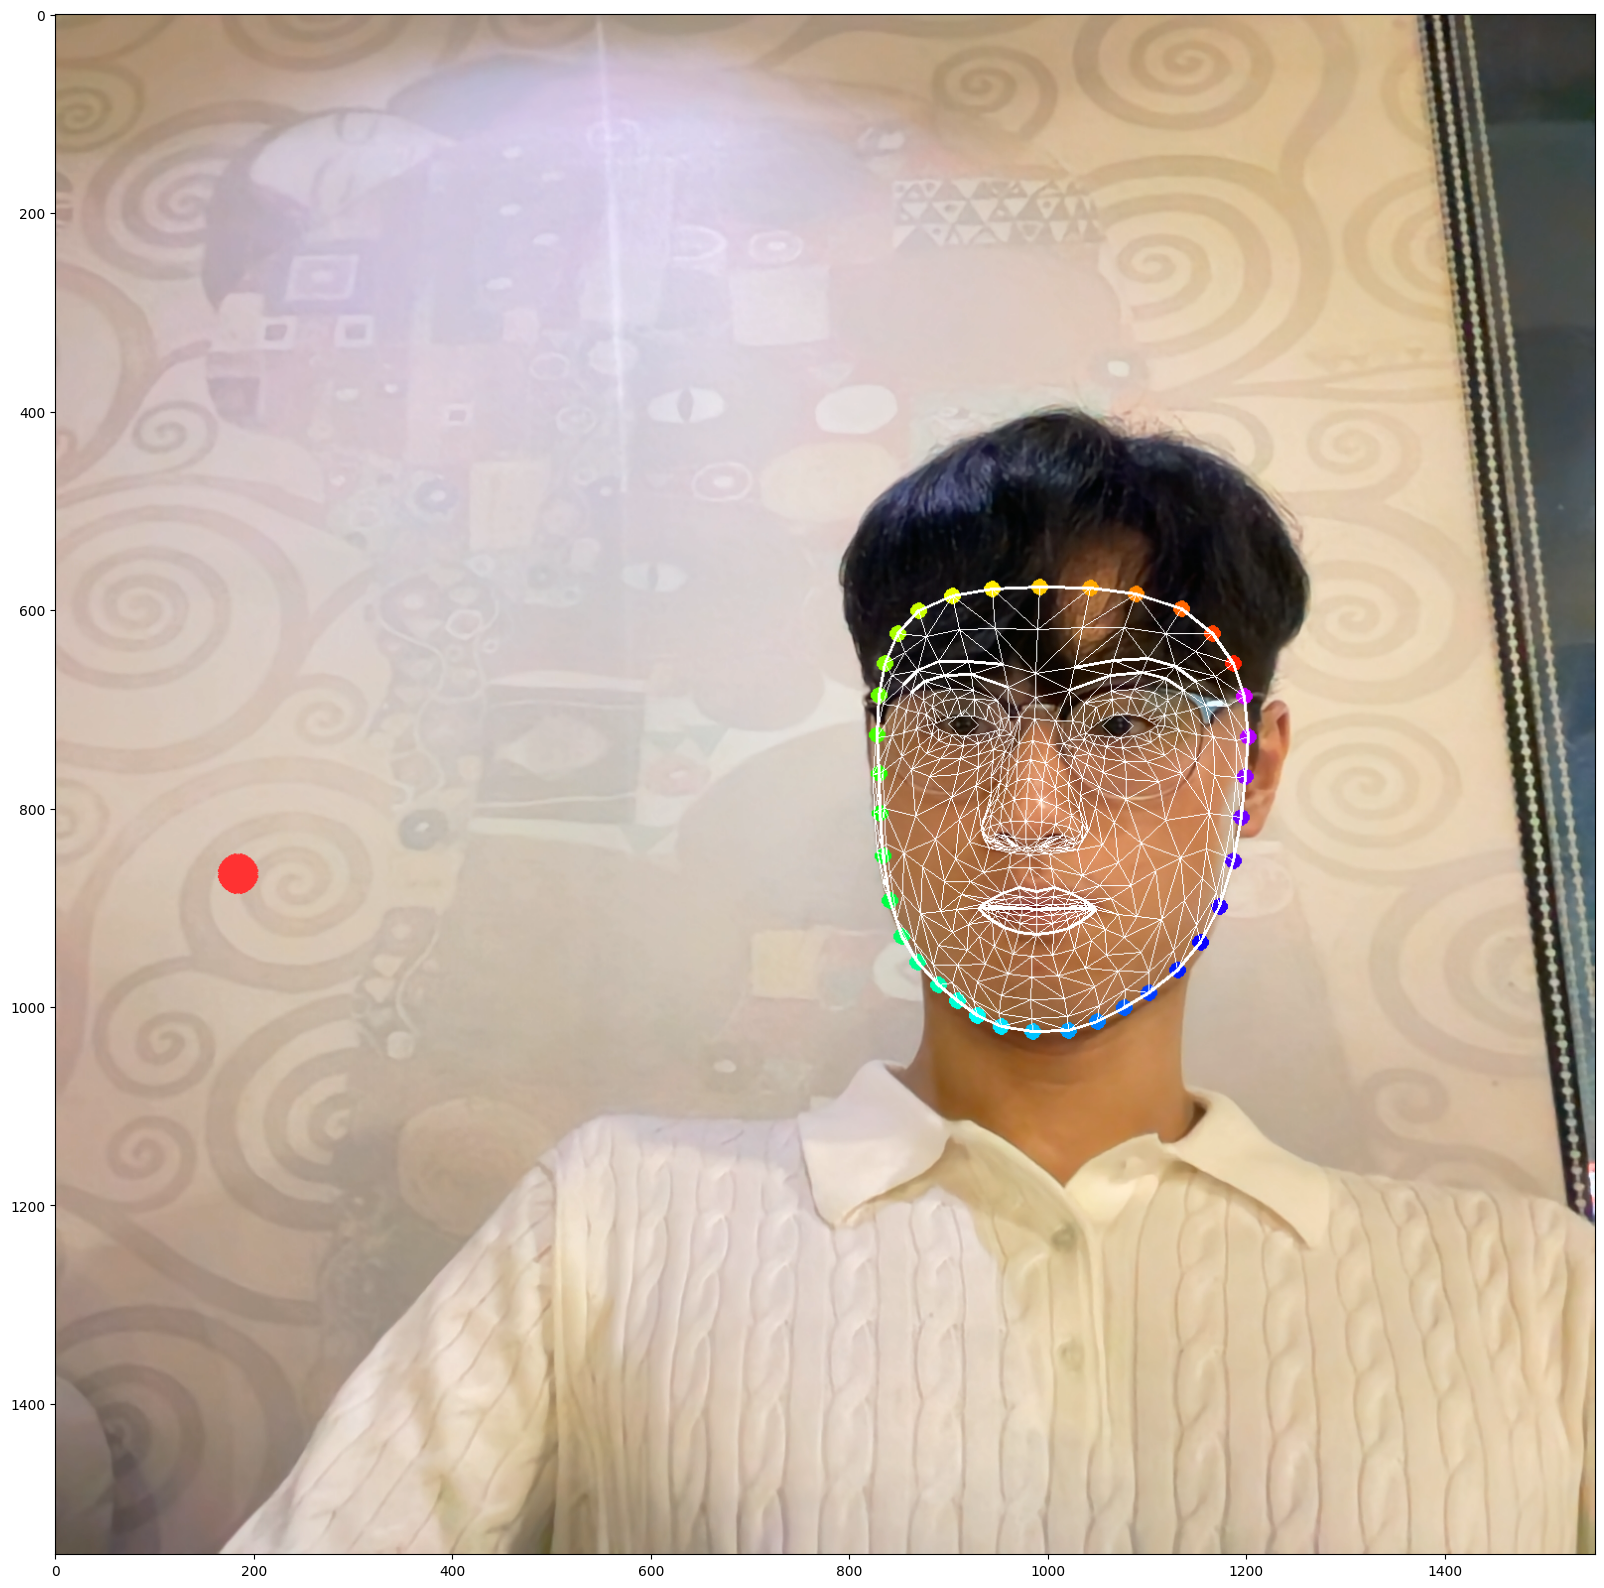

In [4]:
IDX = 9100
LIST_IDX_TO_LOOK = FACE_RIGHT_EYE_PATH_LIST[0]
LIST_IDX_TO_LOOK = FACE_RIGHT_IRIS_PATH_LIST[0]
LIST_IDX_TO_LOOK = FACE_LEFT_IRIS_PATH_LIST[0]
LIST_IDX_TO_LOOK = FACE_LEFT_EYE_PATH_LIST[0]
LIST_IDX_TO_LOOK = FACE_OVAL_PATH_LIST[0]#[6:25]

print(LIST_IDX_TO_LOOK)

data = eye_tracker_dataset_full[IDX]

face_landmark_array = data["face_landmark_array"].numpy()
full_image = torch_to_numpy(data["image"])
image_shape = np.array([full_image.shape[1], full_image.shape[0]])
mouse_position_raw = data["mouse_position"].numpy()
mouse_position = (mouse_position_raw * image_shape).astype(int)

vis_image = full_image.copy()

cv2.polylines(
    vis_image,
    [
        convert2imagecoord(full_image, face_landmark_array, LIST_IDX_TO_LOOK),
    ],
    isClosed=False,
    color=(255,255,255),
    thickness=2
)

list(map(
    lambda pos, list_idx : cv2.circle(
        vis_image,
        tuple(pos),
        5,
        tuple(
            cv2.cvtColor(
                np.uint8(
                    [int(150 * (list_idx / len(LIST_IDX_TO_LOOK))), 255, 255]
                ).reshape(1, 1, 3),
                cv2.COLOR_HSV2RGB
            )[0][0].tolist()
        ),
        5
    ),
    convert2imagecoord(full_image, face_landmark_array, LIST_IDX_TO_LOOK),
    range(len(LIST_IDX_TO_LOOK))
))

cv2.circle(
    vis_image,
    tuple(mouse_position),
    10,
    (255, 50, 50),
    20
)

plt.figure(figsize=(20, 20))
plt.imshow(vis_image)
plt.show()

two_D_visualizer.visualizeFace2D(
    vis_image,
    face_landmark_array
)

plt.figure(figsize=(20, 20))
plt.imshow(vis_image)
plt.show()


In [27]:
FACE_IDX_LIST_HOR = FACE_OVAL_PATH_LIST[0][6:] + FACE_OVAL_PATH_LIST[0][1:6]

print(FACE_IDX_LIST_HOR)

diff_vec = np.array(list(map(
    lambda idx : face_landmark_array[FACE_IDX_LIST_HOR[-(idx + 1)]] - face_landmark_array[FACE_IDX_LIST_HOR[idx + 1]],
    range(len(FACE_IDX_LIST_HOR) // 2 - 1)
)))

diff_vec_normalized = diff_vec / np.sqrt(np.sum(diff_vec * diff_vec, axis=1)).reshape(-1, 1)

np.matmul(diff_vec_normalized, diff_vec_normalized.T)

[10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]


array([[0.99999994, 0.99997795, 0.9999677 , 0.9999256 , 0.999884  ,
        0.99985415, 0.99982744, 0.9997874 , 0.9997685 , 0.9997025 ,
        0.9996088 , 0.9994776 , 0.99927086, 0.9989049 , 0.99861926,
        0.9983411 , 0.998305  ],
       [0.99997795, 1.        , 0.9999966 , 0.9999746 , 0.9999423 ,
        0.9999133 , 0.9998887 , 0.99985623, 0.99982506, 0.99975693,
        0.999667  , 0.9995309 , 0.99929297, 0.99893105, 0.99865025,
        0.9983809 , 0.9983193 ],
       [0.9999677 , 0.9999966 , 0.99999994, 0.99998933, 0.99996656,
        0.999944  , 0.99992406, 0.9998969 , 0.9998699 , 0.99980986,
        0.99972945, 0.9996046 , 0.99937946, 0.9990388 , 0.99877244,
        0.99851614, 0.99845326],
       [0.9999256 , 0.9999746 , 0.99998933, 1.0000001 , 0.9999934 ,
        0.9999806 , 0.9999678 , 0.9999501 , 0.99992645, 0.99987787,
        0.9998122 , 0.9997028 , 0.99948925, 0.99918056, 0.9989364 ,
        0.9987012 , 0.9986308 ],
       [0.999884  , 0.9999423 , 0.99996656, 0.999993

In [28]:
FACE_IDX_LIST_VEC = FACE_OVAL_PATH_LIST[0][-4:] + FACE_OVAL_PATH_LIST[0][1:-4]

print(FACE_IDX_LIST_VEC)

diff_vec = np.array(list(map(
    lambda idx : print(FACE_IDX_LIST_VEC[-(idx + 1)], FACE_IDX_LIST_VEC[idx + 1]),
    range(len(FACE_IDX_LIST_VEC) // 2 - 1)
)))

diff_vec = np.array(list(map(
    lambda idx : face_landmark_array[FACE_IDX_LIST_VEC[-(idx + 1)]] - face_landmark_array[FACE_IDX_LIST_VEC[idx + 1]],
    range(len(FACE_IDX_LIST_VEC) // 2 - 1)
)))

diff_vec_normalized = diff_vec / np.sqrt(np.sum(diff_vec * diff_vec, axis=1)).reshape(-1, 1)

np.matmul(diff_vec_normalized, diff_vec_normalized.T)

[93, 234, 127, 162, 21, 54, 103, 67, 109, 10, 338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132]
132 234
58 127
172 162
136 21
150 54
149 103
176 67
148 109
152 10
377 338
400 297
378 332
379 284
365 251
397 389
288 356
361 454


array([[1.0000001 , 0.9996448 , 0.99883866, 0.9976634 , 0.9963605 ,
        0.99422395, 0.9915024 , 0.98838115, 0.9851589 , 0.98013294,
        0.97478443, 0.968065  , 0.96642166, 0.9692816 , 0.9718235 ,
        0.9756138 , 0.9822545 ],
       [0.9996448 , 1.        , 0.99973035, 0.9989418 , 0.9978033 ,
        0.9952404 , 0.9914089 , 0.9873488 , 0.9832318 , 0.97736436,
        0.9710353 , 0.9630573 , 0.96054137, 0.96328455, 0.96583474,
        0.969834  , 0.9771153 ],
       [0.99883866, 0.99973035, 1.        , 0.9997199 , 0.9989596 ,
        0.996562  , 0.992304  , 0.98776895, 0.98310846, 0.976784  ,
        0.9697945 , 0.960829  , 0.9573281 , 0.95967305, 0.9619853 ,
        0.9658842 , 0.97332436],
       [0.9976634 , 0.9989418 , 0.9997199 , 1.        , 0.9997399 ,
        0.997898  , 0.993702  , 0.98903465, 0.9841015 , 0.9776082 ,
        0.9702154 , 0.96050644, 0.95600384, 0.9577841 , 0.95970607,
        0.96330076, 0.9705638 ],
       [0.9963605 , 0.9978033 , 0.9989596 , 0.999739

In [43]:
DEG1 = 0
DEG2 = 89.9999

th1 = np.deg2rad(DEG1)
th2 = np.deg2rad(DEG2)
v1 = np.array([np.cos(th1), np.sin(th1)])
v2 = np.array([np.cos(th2), np.sin(th2)])

print(np.dot(v1, v2))

1.7453292520723307e-06


In [37]:
OVAL_UPPER_HALF = [361, 288, 397, 365, 379, 378, 400, 377, 152, 148, 176, 149, 150, 136, 172, 58, 132]
OVAL_LOWER_HALF = [234, 127, 162, 21, 54, 103, 67, 109, 10, 338, 297, 332, 284, 251, 389, 356, 454]
OVAL_LEFT_HALF =  [338, 297, 332, 284, 251, 389, 356, 454, 323, 361, 288, 397, 365, 379, 378, 400, 377]
OVAL_RIGHT_HALF = [148, 176, 149, 150, 136, 172, 58, 132, 93, 234, 127, 162, 21, 54, 103, 67, 109]

ver_mean = np.mean(face_landmark_array[OVAL_LOWER_HALF], axis=0) - np.mean(face_landmark_array[OVAL_UPPER_HALF], axis=0)
hor_mean = np.mean(face_landmark_array[OVAL_RIGHT_HALF], axis=0) - np.mean(face_landmark_array[OVAL_LEFT_HALF],  axis=0)

np.dot(ver_mean, hor_mean)

0.0006847348